In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN

import gensim
from gensim import corpora

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

In [4]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

In [5]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

In [6]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_ind
from math import sqrt
from scipy.stats import mannwhitneyu

In [8]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from gensim.models import Word2Vec
from gensim.models import FastText
import numpy as np
np.random.seed(42)

In [9]:
pd.set_option('display.max_columns', None)

### Retrieving the data

#### DF 5

In [10]:
df5 = pd.read_csv('df5.csv')

In [11]:
df5.head(2)

,Unnamed: 0,account_balance,duration,credit_history,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,sex_marital,guarantor,residence_since,property,age,other_installment_plans,type_of_housing,nr_of_existing_credits,job,number_of_dependents,telephone,foreign,target
0,0,0,0,4,4,1,4,4,3,2,0,3,0,9,2,1,1,2,0,1,0,1
1,1,1,7,2,4,8,0,2,1,1,0,1,0,0,2,1,0,2,0,0,0,2


#### DF 5c

In [12]:
df5c = pd.read_csv('df5c.csv')

In [13]:
df5c.head(2)

,Unnamed: 0,account_balance,duration,credit_history,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,sex_marital,guarantor,residence_since,property,age,other_installment_plans,type_of_housing,nr_of_existing_credits,job,number_of_dependents,telephone,foreign,target
0,0,0,6,4,4,1169,4,4,4,2,0,4,0,67,2,1,2,2,1,1,0,1
1,1,1,48,2,4,5951,0,2,2,1,0,2,0,22,2,1,1,2,1,0,0,2


#### DF7

In [14]:
#df7 = pd.read_csv('df7.csv')
df7 = pd.read_csv('df7.csv', index_col=0)

In [15]:
df7.head(2)

,account_balance,duration,credit_history,purpose,credit_amount,savings_bond_value,employed_since,intallment_rate,sex_marital,guarantor,residence_since,property,age,other_installment_plans,type_of_housing,nr_of_existing_credits,job,number_of_dependents,telephone,foreign,target,content
0,A11,A20,A34,A43,A51,A65,A75,A84,A93,A101,A114,A121,A139,A143,A152,A162,A173,A181,A192,A201,__label__1,__label__1 A11 A20 A34 A43 A51 A65 A75 A84 A93...
1,A12,A27,A32,A43,A58,A61,A73,A82,A92,A101,A112,A121,A130,A143,A152,A161,A173,A181,A191,A201,__label__2,__label__2 A12 A27 A32 A43 A58 A61 A73 A82 A92...


# Models

In [12]:
# Initialize lists to store evaluation metrics for each fold
dataset_used = []
model_used = []
data_balancing_technique = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
conf_matrices = []

In [13]:
#combined_metrics = pd.DataFrame()

combined_metrics = pd.DataFrame(columns=['dataset', 'model', 'data balancing technique', 'fold', 'precision_1','precision_2','recall_1','recall_2','f1-score_1','f1-score_2','support_1','support_2','TP','FP','TN','FN'])

In [125]:
# Step 1: Load and Prepare the Data
# For illustration, let's use a synthetic dataset
from sklearn.datasets import make_classification

In [126]:
# Create a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
X = pd.DataFrame(X, columns=feature_names)
y = pd.Series(y, name='Target')

In [127]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
X_train

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9
29,0.371967,-0.067007,0.479997,1.623480,-1.490996,1.470076,1.099151,1.217927,-0.240961,-2.373570
535,2.070324,1.464587,-0.590828,0.591667,1.497615,0.438780,2.896845,-0.025347,-0.162282,-0.353911
695,1.143504,-0.494064,-0.424899,-1.859175,0.336402,-0.181933,-1.101706,-0.622748,0.632121,2.854956
557,-0.203697,-0.042198,-1.242179,-1.189945,-0.063093,1.366014,-0.306214,-1.136450,0.597073,0.293876
836,0.613594,-4.008159,1.362065,0.246883,3.232119,-1.652753,1.974092,-0.505345,-1.016884,5.648851
...,...,...,...,...,...,...,...,...,...,...
106,3.274825,-0.309191,-0.233705,0.860286,2.458877,-0.160509,3.864784,2.188499,1.505791,2.270177
270,1.075854,0.607040,-0.527685,0.837255,-1.071172,2.352453,1.616891,0.703065,-0.648300,-2.175824
860,1.733099,-0.338795,-0.621769,-1.050389,1.269763,-0.185912,0.633752,0.254426,0.179071,2.685518
435,1.056475,0.448128,-1.623739,-1.403656,0.241782,-0.642160,-1.033562,0.073058,-0.627443,1.757763


In [128]:
# Train a Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [130]:
# Predict and evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


In [131]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1])

In [103]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

In [48]:
correct_indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  70,  71,  72,  73,  74,  75,  77,  78,  79,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19

In [49]:
incorrect_indices

array([ 26,  49,  68,  69,  76,  80, 124, 129, 162, 164, 198], dtype=int64)

In [50]:
X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [51]:
# Step 3: Perform a t-test for Each Feature
t_test_results = {}
for feature in feature_names:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    t_stat, p_value = ttest_ind(correct_values, incorrect_values, equal_var=False)
    
    # Calculate Cohen's d for effect size
    mean_diff = correct_values.mean() - incorrect_values.mean()
    pooled_std = sqrt((correct_values.var() + incorrect_values.var()) / 2)
    cohen_d = mean_diff / pooled_std
    
    t_test_results[feature] = (t_stat, p_value, cohen_d)

In [52]:
# Convert results to a DataFrame for easier interpretation
t_test_df = pd.DataFrame(t_test_results, index=['t_stat', 'p_value', 'effect_size']).T
t_test_df = t_test_df.sort_values(by='p_value')

In [53]:
print("\nT-test Results (sorted by p-value):")
print(t_test_df)


T-test Results (sorted by p-value):
             t_stat   p_value  effect_size
Feature_5  5.532701  0.000100     1.379238
Feature_9 -3.072871  0.010177    -0.915749
Feature_4 -2.670212  0.019839    -0.693473
Feature_0 -2.499200  0.028790    -0.741928
Feature_1  1.624834  0.131322     0.480507
Feature_3 -0.873775  0.397797    -0.210437
Feature_2  0.613559  0.552449     0.216316
Feature_8  0.333056  0.745446     0.110943
Feature_6 -0.306699  0.764174    -0.080531
Feature_7  0.210117  0.837018     0.055628


In [54]:
# Step 1: Load and Prepare the Data
# For illustration, let's use a synthetic dataset
from sklearn.datasets import make_classification

In [55]:
# Create a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
X = pd.DataFrame(X, columns=feature_names)
y = pd.Series(y, name='Target')

In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Train a Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [58]:
# Predict and evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


In [59]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

In [60]:
X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [61]:
# Step 3: Perform a t-test for Each Feature
t_test_results = {}
for feature in feature_names:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    t_stat, p_value = ttest_ind(correct_values, incorrect_values, equal_var=False)
    t_test_results[feature] = t_stat

In [62]:
# Convert results to a DataFrame
t_test_df = pd.DataFrame(t_test_results, index=['t_stat']).T

In [63]:
# Calculate the proportion of each attribute's contribution
# Convert absolute t-statistic values to importance scores
t_test_df['importance'] = t_test_df['t_stat'].abs()

In [64]:
# Normalize the importance scores to get proportions
t_test_df['proportion'] = t_test_df['importance'] / t_test_df['importance'].sum()

In [65]:
# Sort by proportion
t_test_df = t_test_df.sort_values(by='proportion', ascending=False)

In [66]:
print("\nFeature Importance (sorted by proportion):")
print(t_test_df[['importance', 'proportion']])


Feature Importance (sorted by proportion):
           importance  proportion
Feature_5    5.532701    0.311929
Feature_9    3.072871    0.173246
Feature_4    2.670212    0.150545
Feature_0    2.499200    0.140903
Feature_1    1.624834    0.091607
Feature_3    0.873775    0.049263
Feature_2    0.613559    0.034592
Feature_8    0.333056    0.018777
Feature_6    0.306699    0.017291
Feature_7    0.210117    0.011846


In [133]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_ind
from math import sqrt

In [134]:
# Step 1: Load and Prepare the Data
# For illustration, let's use a synthetic dataset
from sklearn.datasets import make_classification

In [159]:
# Create a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
X = pd.DataFrame(X, columns=feature_names)
y = pd.Series(y, name='Target')

In [160]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
X_train

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9
29,0.371967,-0.067007,0.479997,1.623480,-1.490996,1.470076,1.099151,1.217927,-0.240961,-2.373570
535,2.070324,1.464587,-0.590828,0.591667,1.497615,0.438780,2.896845,-0.025347,-0.162282,-0.353911
695,1.143504,-0.494064,-0.424899,-1.859175,0.336402,-0.181933,-1.101706,-0.622748,0.632121,2.854956
557,-0.203697,-0.042198,-1.242179,-1.189945,-0.063093,1.366014,-0.306214,-1.136450,0.597073,0.293876
836,0.613594,-4.008159,1.362065,0.246883,3.232119,-1.652753,1.974092,-0.505345,-1.016884,5.648851
...,...,...,...,...,...,...,...,...,...,...
106,3.274825,-0.309191,-0.233705,0.860286,2.458877,-0.160509,3.864784,2.188499,1.505791,2.270177
270,1.075854,0.607040,-0.527685,0.837255,-1.071172,2.352453,1.616891,0.703065,-0.648300,-2.175824
860,1.733099,-0.338795,-0.621769,-1.050389,1.269763,-0.185912,0.633752,0.254426,0.179071,2.685518
435,1.056475,0.448128,-1.623739,-1.403656,0.241782,-0.642160,-1.033562,0.073058,-0.627443,1.757763


In [162]:
# Train a Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [163]:
# Predict and evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.94


In [164]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1])

In [165]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

In [166]:
correct_indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  70,  71,  72,  73,  74,  75,  77,  78,  79,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 125, 126, 127, 128, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150,
       151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 163, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 19

In [167]:
incorrect_indices

array([ 26,  49,  68,  69,  76,  80, 124, 129, 162, 164, 198], dtype=int64)

In [168]:
X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [169]:
X_correct

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9
521,0.537817,3.044738,-0.869433,-0.393873,1.387787,2.544672,2.890934,0.398564,1.667013,-2.746810
737,1.179732,-1.021758,-0.017867,-1.361880,-1.222244,0.293490,-1.801665,1.198276,-1.314773,2.115746
740,0.120802,0.055184,0.092930,-2.947730,0.112338,0.358616,-2.192230,-0.428675,0.337363,2.422529
660,-2.294067,-2.156770,0.758801,0.392150,3.645581,0.510328,3.041384,1.574949,0.494625,1.479177
411,1.088863,1.835064,-0.470071,-0.567721,1.108675,0.252472,1.143460,0.351407,1.111622,-0.268725
...,...,...,...,...,...,...,...,...,...,...
213,-0.910454,3.665127,-0.028552,-1.058867,0.623414,4.136189,2.208787,-0.008362,-0.577614,-4.521643
408,-2.230464,-1.357300,-1.560498,0.482295,2.802356,0.116071,2.198223,-1.381770,0.063540,0.593744
332,-0.179527,0.152993,-1.721683,-0.704471,0.843569,2.763066,1.821798,1.060289,-1.627898,-0.594459
208,0.543913,-1.470367,0.977545,-1.253147,-1.466696,-0.946111,-2.933937,0.220114,-0.545020,2.566668


In [170]:
# Step 3: Perform a t-test and Calculate Effect Size for Each Feature
t_test_results = {}
for feature in feature_names:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    t_stat, p_value = ttest_ind(correct_values, incorrect_values, equal_var=False)
    
    # Calculate Cohen's d for effect size
    mean_diff = correct_values.mean() - incorrect_values.mean()
    pooled_std = sqrt((correct_values.var() + incorrect_values.var()) / 2)
    cohen_d = mean_diff / pooled_std
    
    t_test_results[feature] = (t_stat, p_value, cohen_d)

In [171]:
# Convert results to a DataFrame for easier interpretation
t_test_df = pd.DataFrame(t_test_results, index=['t_stat', 'p_value', 'effect_size']).T

In [172]:
# Calculate the proportion of each attribute's contribution
# Convert absolute t-statistic values to importance scores
t_test_df['importance'] = t_test_df['t_stat'].abs()

In [173]:
# Normalize the importance scores to get proportions
t_test_df['proportion'] = t_test_df['importance'] / t_test_df['importance'].sum()

In [174]:
# Sort by proportion
t_test_df = t_test_df.sort_values(by='proportion', ascending=False)

In [175]:
print("\nFeature Importance (sorted by proportion):")
print(t_test_df)


Feature Importance (sorted by proportion):
             t_stat   p_value  effect_size  importance  proportion
Feature_5  5.532701  0.000100     1.379238    5.532701    0.311929
Feature_9 -3.072871  0.010177    -0.915749    3.072871    0.173246
Feature_4 -2.670212  0.019839    -0.693473    2.670212    0.150545
Feature_0 -2.499200  0.028790    -0.741928    2.499200    0.140903
Feature_1  1.624834  0.131322     0.480507    1.624834    0.091607
Feature_3 -0.873775  0.397797    -0.210437    0.873775    0.049263
Feature_2  0.613559  0.552449     0.216316    0.613559    0.034592
Feature_8  0.333056  0.745446     0.110943    0.333056    0.018777
Feature_6 -0.306699  0.764174    -0.080531    0.306699    0.017291
Feature_7  0.210117  0.837018     0.055628    0.210117    0.011846


In [178]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import ttest_ind
from math import sqrt

In [179]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [180]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [181]:
# Train a Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [182]:
# Predict and evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.81


In [183]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [184]:
# Step 3: Perform a t-test and Calculate Effect Size for Each Feature
t_test_results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    t_stat, p_value = ttest_ind(correct_values, incorrect_values, equal_var=False)
    
    # Calculate Cohen's d for effect size
    mean_diff = correct_values.mean() - incorrect_values.mean()
    pooled_std = sqrt((correct_values.var() + incorrect_values.var()) / 2)
    cohen_d = mean_diff / pooled_std
    
    t_test_results[feature] = (t_stat, p_value, cohen_d)

In [186]:
# Convert results to a DataFrame for easier interpretation
t_test_df = pd.DataFrame(t_test_results, index=['t_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute t-statistic values to importance scores
t_test_df['importance'] = t_test_df['t_stat'].abs()

# Normalize the importance scores to get proportions
t_test_df['proportion'] = t_test_df['importance'] / t_test_df['importance'].sum()

# Sort by proportion
t_test_df = t_test_df.sort_values(by='proportion', ascending=False)

In [187]:
print("\nFeature Importance (sorted by proportion):")
print(t_test_df)


Feature Importance (sorted by proportion):
                           t_stat   p_value  effect_size  importance  \
account_balance          4.772352  0.000009     0.767922    4.772352   
savings_bond_value       3.265679  0.001556     0.504100    3.265679   
telephone                1.734144  0.087721     0.297591    1.734144   
credit_history           1.456249  0.150153     0.248487    1.456249   
type_of_housing          1.341067  0.185729     0.251063    1.341067   
credit_amount            1.275752  0.205568     0.199849    1.275752   
job                      1.099507  0.276419     0.202100    1.099507   
sex_marital              1.045639  0.300349     0.191623    1.045639   
nr_of_existing_credits   1.004531  0.319275     0.178694    1.004531   
guarantor               -0.974473  0.334301    -0.181782    0.974473   
age                     -0.912067  0.366065    -0.173138    0.912067   
employed_since          -0.905575  0.368955    -0.162283    0.905575   
property            

In [191]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [192]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
results_df['importance'] = results_df['effect_size'].abs()

# Normalize the importance scores to get proportions
results_df['proportion'] = results_df['importance'] / results_df['importance'].sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [193]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                         u_stat   p_value  effect_size  importance  proportion
account_balance          4293.0  0.000189     0.367415    0.367415    0.198520
savings_bond_value       3801.0  0.016713     0.210702    0.210702    0.113846
telephone                3565.5  0.109803     0.135690    0.135690    0.073316
credit_history           3564.0  0.145656     0.135213    0.135213    0.073057
type_of_housing          3540.5  0.125127     0.127727    0.127727    0.069013
nr_of_existing_credits   3470.5  0.221246     0.105431    0.105431    0.056966
job                      3432.0  0.294998     0.093168    0.093168    0.050340
sex_marital              3425.5  0.330693     0.091097    0.091097    0.049221
employed_since           2869.5  0.388982    -0.086001    0.086001    0.046468
guarantor                2901.5  0.086509    -0.075808    0.075808    0.040960
property                 3361.5  0.477517     0.070712    0.070712    0.038207
duration

In [35]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# data balancing method 
# Oversampling the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [38]:
# Train a Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [39]:
# Predict and evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.79


In [40]:
# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

In [41]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)

In [42]:
# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
results_df['importance'] = results_df['effect_size'].abs()

# Normalize the importance scores to get proportions
results_df['proportion'] = results_df['importance'] / results_df['importance'].sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [43]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                         u_stat   p_value  effect_size  importance  proportion
account_balance          4475.5  0.000597     0.325878    0.325878    0.158444
credit_history           4209.0  0.005836     0.246926    0.246926    0.120058
telephone                4137.5  0.005781     0.225744    0.225744    0.109759
savings_bond_value       4082.0  0.013705     0.209302    0.209302    0.101764
nr_of_existing_credits   3977.5  0.031794     0.178344    0.178344    0.086712
job                      3773.0  0.169716     0.117760    0.117760    0.057256
residence_since          3764.0  0.223617     0.115094    0.115094    0.055960
type_of_housing          3731.5  0.189237     0.105466    0.105466    0.051278
intallment_rate          3068.0  0.328224    -0.091098    0.091098    0.044292
duration                 3141.0  0.482744    -0.069471    0.069471    0.033777
property                 3595.0  0.498222     0.065027    0.065027    0.031617
age     

In [44]:
# Feature Importance
feature_importances = rf.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [45]:
print("\nFeature Importance:")
print(importance_df)


Feature Importance:
                    Feature  Importance
0           account_balance    0.169528
4             credit_amount    0.111097
1                  duration    0.089716
2            credit_history    0.085531
12                      age    0.080907
3                   purpose    0.056369
5        savings_bond_value    0.053570
6            employed_since    0.047854
10          residence_since    0.039238
8               sex_marital    0.037758
13  other_installment_plans    0.035741
11                 property    0.033661
7           intallment_rate    0.032274
16                      job    0.026064
14          type_of_housing    0.023875
9                 guarantor    0.023862
18                telephone    0.019064
15   nr_of_existing_credits    0.016852
17     number_of_dependents    0.012021
19                  foreign    0.005018


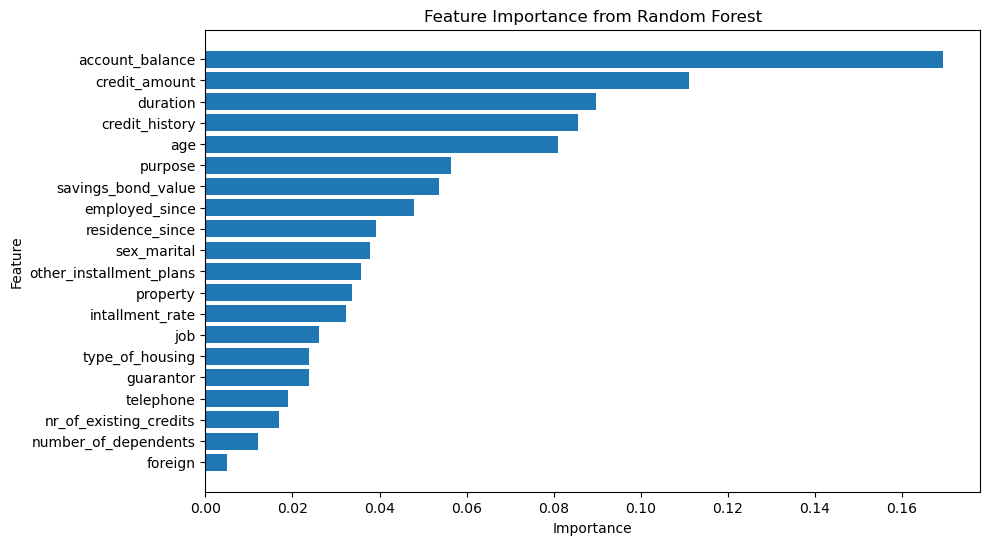

In [46]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [47]:
from sklearn.svm import SVC, LinearSVC

In [48]:
# Load your DataFrame (assuming df5c)
X = df5c.drop(columns=['target'])
y = df5c['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear SVC model
svc = LinearSVC(random_state=42, max_iter=10000)
svc.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate feature importance using the absolute magnitude of coefficients
coefficients = svc.coef_.flatten()
feature_importances = np.abs(coefficients)
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

Accuracy: 0.53


In [49]:
print("\nFeature Importance from Linear SVC:")
print(importance_df)


Feature Importance from Linear SVC:
                    Feature  Importance
1           account_balance    0.193331
12                 property    0.137585
11          residence_since    0.098620
19                telephone    0.096147
18     number_of_dependents    0.084498
14  other_installment_plans    0.082901
3            credit_history    0.082347
7            employed_since    0.076008
8           intallment_rate    0.068904
17                      job    0.054266
10                guarantor    0.048642
4                   purpose    0.046588
20                  foreign    0.041366
9               sex_marital    0.030115
15          type_of_housing    0.025513
2                  duration    0.024113
13                      age    0.020212
16   nr_of_existing_credits    0.016513
6        savings_bond_value    0.006536
0                Unnamed: 0    0.000494
5             credit_amount    0.000200


In [16]:
#df7 = pd.read_csv('df7.csv')
df7 = pd.read_csv('df7.csv', index_col=0)

# Assuming 'df7' is your DataFrame with features and the target column
X = df7['content'].apply(lambda x: x.split(' ', 1)[1])  # Drop the target column to get the feature columns
y = df7['target'].apply(lambda x: int(x.split("__label__")[1]))  # Target column to predict

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train = X_train.apply(preprocess)
X_test = X_test.apply(preprocess)

In [22]:
sentences = [sentence.split() for sentence in X_train]

In [23]:
# Train the FastText model
fasttext_model = FastText(sentences, vector_size=100, window=20, min_count=2, workers=4, seed=42)

In [24]:
def vectorize(sentence):
        words = sentence.split()
        words_vecs = [fasttext_model.wv[word] for word in words if word in fasttext_model.wv]
        if len(words_vecs) == 0:
            return np.zeros(100)
        words_vecs = np.array(words_vecs)
        return words_vecs.mean(axis=0)

In [25]:
X_train = np.array([vectorize(sentence) for sentence in X_train])
X_test = np.array([vectorize(sentence) for sentence in X_test])

In [26]:
#clf = LogisticRegression()
clf = LinearRegression()
clf.fit(X_train, y_train)
    
y_pred = clf.predict(X_test)
    
y_pred = np.round(y_pred)
    
y_pred[y_pred <= 0] = 1
y_pred[y_pred >= 2] = 2

In [28]:
# Assuming df5c is your DataFrame
# Drop the target column and the first column (assuming it's the index or another non-feature column)
X = df5c.drop(columns=['target']).iloc[:, 1:]
y = df5c['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 2: Split the Dataset Based on Prediction Accuracy
correct_indices = np.where(y_test == y_pred)[0]
incorrect_indices = np.where(y_test != y_pred)[0]

X_correct = X_test.iloc[correct_indices]
X_incorrect = X_test.iloc[incorrect_indices]

Accuracy: 0.75


In [32]:
results = {}
for feature in X.columns:
    correct_values = X_correct[feature]
    incorrect_values = X_incorrect[feature]
    
    # Perform Mann-Whitney U test
    u_stat, p_value = mannwhitneyu(correct_values, incorrect_values, alternative='two-sided')
    
    # Calculate Rank-Biserial Correlation (effect size)
    n1 = len(correct_values)
    n2 = len(incorrect_values)
    rank_biserial = (2 * u_stat / (n1 * n2)) - 1
    
    results[feature] = (u_stat, p_value, rank_biserial)
    

# Convert results to a DataFrame for easier interpretation
results_df = pd.DataFrame(results, index=['u_stat', 'p_value', 'effect_size']).T

# Calculate the proportion of each attribute's contribution
# Convert absolute rank-biserial values to importance scores
results_df['importance'] = results_df['effect_size'].abs()

# Normalize the importance scores to get proportions
results_df['proportion'] = results_df['importance'] / results_df['importance'].sum()

# Sort by proportion
results_df = results_df.sort_values(by='proportion', ascending=False)

In [34]:
print("\nFeature Importance (sorted by proportion):")
print(results_df)


Feature Importance (sorted by proportion):
                         u_stat   p_value  effect_size  importance  proportion
account_balance          5178.0  0.000024     0.380800    0.380800    0.166434
savings_bond_value       4705.5  0.001559     0.254800    0.254800    0.111364
purpose                  2936.0  0.018977    -0.217067    0.217067    0.094872
other_installment_plans  4482.0  0.003627     0.195200    0.195200    0.085315
credit_history           4400.0  0.041409     0.173333    0.173333    0.075758
duration                 3134.0  0.079840    -0.164267    0.164267    0.071795
age                      3141.5  0.086036    -0.162267    0.162267    0.070921
nr_of_existing_credits   4176.5  0.149122     0.113733    0.113733    0.049709
intallment_rate          3426.5  0.329095    -0.086267    0.086267    0.037704
telephone                4050.0  0.303072     0.080000    0.080000    0.034965
residence_since          4041.0  0.387334     0.077600    0.077600    0.033916
sex_mari

In [59]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
import matplotlib.pyplot as plt
import seaborn as sns

# Generate example data
np.random.seed(42)
#group1 = np.random.normal(loc=20, scale=5, size=100)
#group2 = np.random.normal(loc=22, scale=5, size=100)

group1 = np.random.exponential(scale=2, size=100)
group2 = np.random.exponential(scale=3, size=100)

In [60]:
# Check Normality
def check_normality(data, alpha=0.05):
    stat, p = shapiro(data)
    if p > alpha:
        return True
    else:
        return False

normality_group1 = check_normality(group1)
normality_group2 = check_normality(group2)

In [61]:
print(f"Group 1 normal: {normality_group1}")
print(f"Group 2 normal: {normality_group2}")

Group 1 normal: False
Group 2 normal: False


In [62]:
# Check Homogeneity of Variance
stat, p = levene(group1, group2)
equal_variances = p > 0.05
print(f"Equal variances: {equal_variances}")

Equal variances: False


In [63]:
# Determine which test to use
def perform_test(group1, group2, normal, equal_variances):
    if normal and equal_variances:
        stat, p = ttest_ind(group1, group2)
        test_name = 'T-Test'
    else:
        stat, p = mannwhitneyu(group1, group2)
        test_name = 'Mann-Whitney U Test'
    
    return test_name, stat, p

test_name, stat, p = perform_test(group1, group2, normality_group1 and normality_group2, equal_variances)
print(f"{test_name} result: Statistics={stat:.3f}, p={p:.3f}")

Mann-Whitney U Test result: Statistics=3754.000, p=0.002


In [64]:
# Visualization
df = pd.DataFrame({
    'Value': np.concatenate([group1, group2]),
    'Group': ['Group 1'] * len(group1) + ['Group 2'] * len(group2)
})

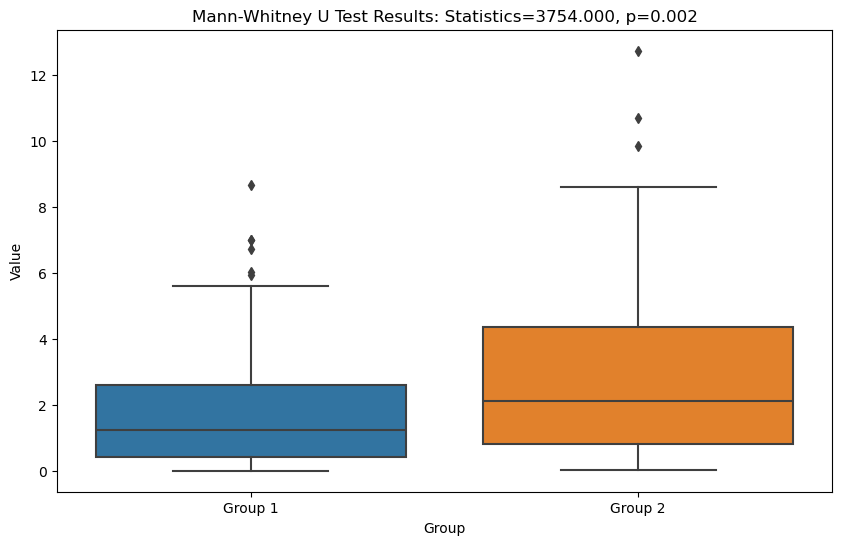

In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Value', data=df)
plt.title(f'{test_name} Results: Statistics={stat:.3f}, p={p:.3f}')
plt.show()

# DecisionTreeClassifier

## DF5

In [14]:
# Assuming 'df5' is your DataFrame with features and the target column
# Replace 'features' with the actual list of feature columns
features = df5.drop(columns=['target'])  # Drop the target column to get the feature columns
target = df5['target']  # Target column to predict

# Initialize a Decision Tree classifier
base_estimator = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator, n_estimators=10, random_state=42)

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

i = 1

# Perform k-fold cross-validation
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    
    # Convert classification report to DataFrame
    report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    # Convert confusion matrix to DataFrame
    matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
    
    # Extract metrics for class 1
    metrics_1 = report_df.loc['1', ['precision', 'recall', 'f1-score', 'support']]

    # Extract metrics for class 2
    metrics_2 = report_df.loc['2', ['precision', 'recall', 'f1-score', 'support']]

    # Extract TP, TN, FP, FN counts from the confusion matrix DataFrame
    TP = matrix_df.loc[0, 0]
    TN = matrix_df.loc[1, 1]
    FP = matrix_df.loc[1, 0]
    FN = matrix_df.loc[0, 1]
    
    new_metric_row = {
    'dataset': 'DF5',
    'model' : 'BaggedTreeClassifier',
    'data balancing technique' : 'None',
    'fold' : i,
    'precision_1': metrics_1['precision'],
    'precision_2': metrics_2['precision'],
    'recall_1': metrics_1['recall'],
    'recall_2': metrics_2['recall'],
    'f1-score_1': metrics_1['f1-score'],
    'f1-score_2': metrics_2['f1-score'],
    'support_1': metrics_1['support'],
    'support_2': metrics_2['support'],
    'TP' : TP,
    'FP' : FP,
    'TN' : TN,
    'FN' : FN
    }
    
    i = i + 1
    
    #combined_metrics = combined_metrics.append(new_metric_row, ignore_index=True)
    combined_metrics.loc[len(combined_metrics)] = new_metric_row
    
    
    # Append evaluation metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Calculate mean evaluation metrics across all folds
mean_accuracy = np.mean(accuracy_scores) #sum(accuracy_scores) / len(accuracy_scores)
mean_precision = np.mean(precision_scores) #sum(precision_scores) / len(precision_scores)
mean_recall = np.mean(recall_scores) #sum(recall_scores) / len(recall_scores)
mean_f1 = np.mean(f1_scores) #sum(f1_scores) / len(f1_scores)

print('Mean Accuracy: {:.2f}'.format(mean_accuracy))
print('Mean Precision: {:.2f}'.format(mean_precision))
print('Mean Recall: {:.2f}'.format(mean_recall))
print('Mean F1-Score: {:.2f}'.format(mean_f1))

Mean Accuracy: 0.74
Mean Precision: 0.72
Mean Recall: 0.74
Mean F1-Score: 0.72


In [15]:
combined_metrics[(combined_metrics['data balancing technique'] == 'None') & (combined_metrics['dataset'] == 'DF5')].head(2)

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
0,DF5,BaggedTreeClassifier,None,1,0.847222,0.642857,0.859155,0.62069,0.853147,0.631579,71.0,29.0,61,11,18,10
1,DF5,BaggedTreeClassifier,None,2,0.769231,0.545455,0.857143,0.40000,0.810811,0.461538,70.0,30.0,60,18,12,10


### DecisionTreeClassifier with df5 data and imbalance data tackling (SMOTE)

In [16]:
# Assuming 'df5' is your DataFrame with features and the target column
# Replace 'features' with the actual list of feature columns
features = df5.drop(columns=['target'])  # Drop the target column to get the feature columns
target = df5['target']  # Target column to predict

# Initialize a Decision Tree classifier
base_estimator = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator, n_estimators=10, random_state=42)

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

i = 1

# Perform k-fold cross-validation
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Convert classification report to DataFrame
    report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    # Convert confusion matrix to DataFrame
    matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
    
    # Extract metrics for class 1
    metrics_1 = report_df.loc['1', ['precision', 'recall', 'f1-score', 'support']]

    # Extract metrics for class 2
    metrics_2 = report_df.loc['2', ['precision', 'recall', 'f1-score', 'support']]

    # Extract TP, TN, FP, FN counts from the confusion matrix DataFrame
    TP = matrix_df.loc[0, 0]
    TN = matrix_df.loc[1, 1]
    FP = matrix_df.loc[1, 0]
    FN = matrix_df.loc[0, 1]
    
    new_metric_row = {
    'dataset': 'DF5',
    'model' : 'BaggedTreeClassifier',
    'data balancing technique' : 'SMOTE',
    'fold' : i,
    'precision_1': metrics_1['precision'],
    'precision_2': metrics_2['precision'],
    'recall_1': metrics_1['recall'],
    'recall_2': metrics_2['recall'],
    'f1-score_1': metrics_1['f1-score'],
    'f1-score_2': metrics_2['f1-score'],
    'support_1': metrics_1['support'],
    'support_2': metrics_2['support'],
    'TP' : TP,
    'FP' : FP,
    'TN' : TN,
    'FN' : FN
    }
    
    i = i + 1
    
    #combined_metrics = combined_metrics.append(new_metric_row, ignore_index=True)
    combined_metrics.loc[len(combined_metrics)] = new_metric_row
    
    
    # Append evaluation metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Calculate mean evaluation metrics across all folds
mean_accuracy = np.mean(accuracy_scores) #sum(accuracy_scores) / len(accuracy_scores)
mean_precision = np.mean(precision_scores) #sum(precision_scores) / len(precision_scores)
mean_recall = np.mean(recall_scores) #sum(recall_scores) / len(recall_scores)
mean_f1 = np.mean(f1_scores) #sum(f1_scores) / len(f1_scores)

print('Mean Accuracy: {:.2f}'.format(mean_accuracy))
print('Mean Precision: {:.2f}'.format(mean_precision))
print('Mean Recall: {:.2f}'.format(mean_recall))
print('Mean F1-Score: {:.2f}'.format(mean_f1))

Mean Accuracy: 0.73
Mean Precision: 0.72
Mean Recall: 0.73
Mean F1-Score: 0.72


In [17]:
combined_metrics[(combined_metrics['data balancing technique'] == 'SMOTE') & (combined_metrics['dataset'] == 'DF5')].head(2)

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
10,DF5,BaggedTreeClassifier,SMOTE,1,0.847222,0.642857,0.859155,0.62069,0.853147,0.631579,71.0,29.0,61,11,18,10
11,DF5,BaggedTreeClassifier,SMOTE,2,0.794521,0.555556,0.828571,0.50000,0.811189,0.526316,70.0,30.0,58,15,15,12


### DecisionTreeClassifier with df5 data and imbalance data tackling (RandomUnderSampler)

In [18]:
# Assuming 'df5' is your DataFrame with features and the target column
# Replace 'features' with the actual list of feature columns
features = df5.drop(columns=['target'])  # Drop the target column to get the feature columns
target = df5['target']  # Target column to predict

# Initialize a Decision Tree classifier
base_estimator = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator, n_estimators=10, random_state=42)

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

i = 1

# Perform k-fold cross-validation
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Undersampling the majority class
    rus = RandomUnderSampler(random_state=42)
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Convert classification report to DataFrame
    report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    # Convert confusion matrix to DataFrame
    matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
    
    # Extract metrics for class 1
    metrics_1 = report_df.loc['1', ['precision', 'recall', 'f1-score', 'support']]

    # Extract metrics for class 2
    metrics_2 = report_df.loc['2', ['precision', 'recall', 'f1-score', 'support']]

    # Extract TP, TN, FP, FN counts from the confusion matrix DataFrame
    TP = matrix_df.loc[0, 0]
    TN = matrix_df.loc[1, 1]
    FP = matrix_df.loc[1, 0]
    FN = matrix_df.loc[0, 1]
    
    new_metric_row = {
    'dataset': 'DF5',
    'model' : 'BaggedTreeClassifier',
    'data balancing technique' : 'Random Under Sampler',
    'fold' : i,
    'precision_1': metrics_1['precision'],
    'precision_2': metrics_2['precision'],
    'recall_1': metrics_1['recall'],
    'recall_2': metrics_2['recall'],
    'f1-score_1': metrics_1['f1-score'],
    'f1-score_2': metrics_2['f1-score'],
    'support_1': metrics_1['support'],
    'support_2': metrics_2['support'],
    'TP' : TP,
    'FP' : FP,
    'TN' : TN,
    'FN' : FN
    }
    
    i = i + 1
    
    #combined_metrics = combined_metrics.append(new_metric_row, ignore_index=True)
    combined_metrics.loc[len(combined_metrics)] = new_metric_row
    
    
    # Append evaluation metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Calculate mean evaluation metrics across all folds
mean_accuracy = np.mean(accuracy_scores) #sum(accuracy_scores) / len(accuracy_scores)
mean_precision = np.mean(precision_scores) #sum(precision_scores) / len(precision_scores)
mean_recall = np.mean(recall_scores) #sum(recall_scores) / len(recall_scores)
mean_f1 = np.mean(f1_scores) #sum(f1_scores) / len(f1_scores)

print('Mean Accuracy: {:.2f}'.format(mean_accuracy))
print('Mean Precision: {:.2f}'.format(mean_precision))
print('Mean Recall: {:.2f}'.format(mean_recall))
print('Mean F1-Score: {:.2f}'.format(mean_f1))

Mean Accuracy: 0.71
Mean Precision: 0.72
Mean Recall: 0.71
Mean F1-Score: 0.71


In [19]:
combined_metrics[(combined_metrics['data balancing technique'] == 'Random Under Sampler') & (combined_metrics['dataset'] == 'DF5')].head(2)

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
20,DF5,BaggedTreeClassifier,Random Under Sampler,1,0.883333,0.550000,0.746479,0.758621,0.80916,0.637681,71.0,29.0,53,7,22,18
21,DF5,BaggedTreeClassifier,Random Under Sampler,2,0.830769,0.542857,0.771429,0.633333,0.80000,0.584615,70.0,30.0,54,11,19,16


### DecisionTreeClassifier with df5 data and imbalance data tackling (RandomOverSampler)

In [20]:
# Assuming 'df5' is your DataFrame with features and the target column
# Replace 'features' with the actual list of feature columns
features = df5.drop(columns=['target'])  # Drop the target column to get the feature columns
target = df5['target']  # Target column to predict

# Initialize a Decision Tree classifier
base_estimator = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator, n_estimators=10, random_state=42)

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

i = 1

# Perform k-fold cross-validation
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Oversampling the majority class
    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Convert classification report to DataFrame
    report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    # Convert confusion matrix to DataFrame
    matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
    
    # Extract metrics for class 1
    metrics_1 = report_df.loc['1', ['precision', 'recall', 'f1-score', 'support']]

    # Extract metrics for class 2
    metrics_2 = report_df.loc['2', ['precision', 'recall', 'f1-score', 'support']]

    # Extract TP, TN, FP, FN counts from the confusion matrix DataFrame
    TP = matrix_df.loc[0, 0]
    TN = matrix_df.loc[1, 1]
    FP = matrix_df.loc[1, 0]
    FN = matrix_df.loc[0, 1]
    
    new_metric_row = {
    'dataset': 'DF5',
    'model' : 'BaggedTreeClassifier',
    'data balancing technique' : 'Random Over Sampler',
    'fold' : i,
    'precision_1': metrics_1['precision'],
    'precision_2': metrics_2['precision'],
    'recall_1': metrics_1['recall'],
    'recall_2': metrics_2['recall'],
    'f1-score_1': metrics_1['f1-score'],
    'f1-score_2': metrics_2['f1-score'],
    'support_1': metrics_1['support'],
    'support_2': metrics_2['support'],
    'TP' : TP,
    'FP' : FP,
    'TN' : TN,
    'FN' : FN
    }
    
    i = i + 1
    
    #combined_metrics = combined_metrics.append(new_metric_row, ignore_index=True)
    combined_metrics.loc[len(combined_metrics)] = new_metric_row
    
    
    # Append evaluation metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Calculate mean evaluation metrics across all folds
mean_accuracy = np.mean(accuracy_scores) #sum(accuracy_scores) / len(accuracy_scores)
mean_precision = np.mean(precision_scores) #sum(precision_scores) / len(precision_scores)
mean_recall = np.mean(recall_scores) #sum(recall_scores) / len(recall_scores)
mean_f1 = np.mean(f1_scores) #sum(f1_scores) / len(f1_scores)

print('Mean Accuracy: {:.2f}'.format(mean_accuracy))
print('Mean Precision: {:.2f}'.format(mean_precision))
print('Mean Recall: {:.2f}'.format(mean_recall))
print('Mean F1-Score: {:.2f}'.format(mean_f1))

Mean Accuracy: 0.72
Mean Precision: 0.72
Mean Recall: 0.72
Mean F1-Score: 0.71


In [21]:
combined_metrics[(combined_metrics['data balancing technique'] == 'Random Over Sampler') & (combined_metrics['dataset'] == 'DF5')].head(2)

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
30,DF5,BaggedTreeClassifier,Random Over Sampler,1,0.819444,0.571429,0.830986,0.551724,0.825175,0.561404,71.0,29.0,59,13,16,12
31,DF5,BaggedTreeClassifier,Random Over Sampler,2,0.784810,0.619048,0.885714,0.433333,0.832215,0.509804,70.0,30.0,62,17,13,8


### DecisionTreeClassifier with df5 data and imbalance data tackling (SMOTEENN)

In [22]:
# Assuming 'df5' is your DataFrame with features and the target column
# Replace 'features' with the actual list of feature columns
features = df5.drop(columns=['target'])  # Drop the target column to get the feature columns
target = df5['target']  # Target column to predict

# Initialize a Decision Tree classifier
base_estimator = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator, n_estimators=10, random_state=42)

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

i = 1

# Perform k-fold cross-validation
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Apply SMOTEENN for combined over and undersampling
    smote_enn = SMOTEENN(random_state=42)
    X_train_resampled, y_train_resampled = smote_enn.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Convert classification report to DataFrame
    report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    # Convert confusion matrix to DataFrame
    matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
    
    # Extract metrics for class 1
    metrics_1 = report_df.loc['1', ['precision', 'recall', 'f1-score', 'support']]

    # Extract metrics for class 2
    metrics_2 = report_df.loc['2', ['precision', 'recall', 'f1-score', 'support']]

    # Extract TP, TN, FP, FN counts from the confusion matrix DataFrame
    TP = matrix_df.loc[0, 0]
    TN = matrix_df.loc[1, 1]
    FP = matrix_df.loc[1, 0]
    FN = matrix_df.loc[0, 1]
    
    new_metric_row = {
    'dataset': 'DF5',
    'model' : 'BaggedTreeClassifier',
    'data balancing technique' : 'SMOTEENN',
    'fold' : i,
    'precision_1': metrics_1['precision'],
    'precision_2': metrics_2['precision'],
    'recall_1': metrics_1['recall'],
    'recall_2': metrics_2['recall'],
    'f1-score_1': metrics_1['f1-score'],
    'f1-score_2': metrics_2['f1-score'],
    'support_1': metrics_1['support'],
    'support_2': metrics_2['support'],
    'TP' : TP,
    'FP' : FP,
    'TN' : TN,
    'FN' : FN
    }
    
    i = i + 1
    
    #combined_metrics = combined_metrics.append(new_metric_row, ignore_index=True)
    combined_metrics.loc[len(combined_metrics)] = new_metric_row
    
    
    # Append evaluation metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Calculate mean evaluation metrics across all folds
mean_accuracy = np.mean(accuracy_scores) #sum(accuracy_scores) / len(accuracy_scores)
mean_precision = np.mean(precision_scores) #sum(precision_scores) / len(precision_scores)
mean_recall = np.mean(recall_scores) #sum(recall_scores) / len(recall_scores)
mean_f1 = np.mean(f1_scores) #sum(f1_scores) / len(f1_scores)

print('Mean Accuracy: {:.2f}'.format(mean_accuracy))
print('Mean Precision: {:.2f}'.format(mean_precision))
print('Mean Recall: {:.2f}'.format(mean_recall))
print('Mean F1-Score: {:.2f}'.format(mean_f1))

Mean Accuracy: 0.71
Mean Precision: 0.72
Mean Recall: 0.71
Mean F1-Score: 0.71


In [23]:
combined_metrics[(combined_metrics['data balancing technique'] == 'SMOTEENN') & (combined_metrics['dataset'] == 'DF5')].head(2)

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
40,DF5,BaggedTreeClassifier,SMOTEENN,1,0.851852,0.456522,0.647887,0.724138,0.73600,0.560000,71.0,29.0,46,8,21,25
41,DF5,BaggedTreeClassifier,SMOTEENN,2,0.800000,0.485714,0.742857,0.566667,0.77037,0.523077,70.0,30.0,52,13,17,18


### DecisionTreeClassifier with df5 data and imbalance data tackling (SMOTETOMEK)

In [24]:
# Assuming 'df5' is your DataFrame with features and the target column
# Replace 'features' with the actual list of feature columns
features = df5.drop(columns=['target'])  # Drop the target column to get the feature columns
target = df5['target']  # Target column to predict

# Initialize a Decision Tree classifier
base_estimator = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator, n_estimators=10, random_state=42)

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

i = 1

# Perform k-fold cross-validation
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Apply SMOTETomek for combined over and undersampling
    SMOTE_Tomek = SMOTETomek(random_state=42)
    X_train_resampled, y_train_resampled = SMOTE_Tomek.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Convert classification report to DataFrame
    report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    # Convert confusion matrix to DataFrame
    matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
    
    # Extract metrics for class 1
    metrics_1 = report_df.loc['1', ['precision', 'recall', 'f1-score', 'support']]

    # Extract metrics for class 2
    metrics_2 = report_df.loc['2', ['precision', 'recall', 'f1-score', 'support']]

    # Extract TP, TN, FP, FN counts from the confusion matrix DataFrame
    TP = matrix_df.loc[0, 0]
    TN = matrix_df.loc[1, 1]
    FP = matrix_df.loc[1, 0]
    FN = matrix_df.loc[0, 1]
    
    new_metric_row = {
    'dataset': 'DF5',
    'model' : 'BaggedTreeClassifier',
    'data balancing technique' : 'SMOTETomek',
    'fold' : i,
    'precision_1': metrics_1['precision'],
    'precision_2': metrics_2['precision'],
    'recall_1': metrics_1['recall'],
    'recall_2': metrics_2['recall'],
    'f1-score_1': metrics_1['f1-score'],
    'f1-score_2': metrics_2['f1-score'],
    'support_1': metrics_1['support'],
    'support_2': metrics_2['support'],
    'TP' : TP,
    'FP' : FP,
    'TN' : TN,
    'FN' : FN
    }
    
    i = i + 1
    
    #combined_metrics = combined_metrics.append(new_metric_row, ignore_index=True)
    combined_metrics.loc[len(combined_metrics)] = new_metric_row
    
    
    # Append evaluation metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Calculate mean evaluation metrics across all folds
mean_accuracy = np.mean(accuracy_scores) #sum(accuracy_scores) / len(accuracy_scores)
mean_precision = np.mean(precision_scores) #sum(precision_scores) / len(precision_scores)
mean_recall = np.mean(recall_scores) #sum(recall_scores) / len(recall_scores)
mean_f1 = np.mean(f1_scores) #sum(f1_scores) / len(f1_scores)

print('Mean Accuracy: {:.2f}'.format(mean_accuracy))
print('Mean Precision: {:.2f}'.format(mean_precision))
print('Mean Recall: {:.2f}'.format(mean_recall))
print('Mean F1-Score: {:.2f}'.format(mean_f1))

Mean Accuracy: 0.71
Mean Precision: 0.72
Mean Recall: 0.71
Mean F1-Score: 0.71


In [25]:
combined_metrics[(combined_metrics['data balancing technique'] == 'SMOTETomek') & (combined_metrics['dataset'] == 'DF5')].head(2)

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
50,DF5,BaggedTreeClassifier,SMOTETomek,1,0.830986,0.586207,0.830986,0.586207,0.830986,0.586207,71.0,29.0,59,12,17,12
51,DF5,BaggedTreeClassifier,SMOTETomek,2,0.780488,0.666667,0.914286,0.400000,0.842105,0.500000,70.0,30.0,64,18,12,6


## DF5c - Decision Tree Classifier

In [26]:
# Assuming 'df5' is your DataFrame with features and the target column
# Replace 'features' with the actual list of feature columns
features = df5c.drop(columns=['target'])  # Drop the target column to get the feature columns
target = df5c['target']  # Target column to predict

# Initialize a Decision Tree classifier
base_estimator = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator, n_estimators=10, random_state=42)

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

i = 1

# Perform k-fold cross-validation
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Convert classification report to DataFrame
    report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    # Convert confusion matrix to DataFrame
    matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
    
    # Extract metrics for class 1
    metrics_1 = report_df.loc['1', ['precision', 'recall', 'f1-score', 'support']]

    # Extract metrics for class 2
    metrics_2 = report_df.loc['2', ['precision', 'recall', 'f1-score', 'support']]

    # Extract TP, TN, FP, FN counts from the confusion matrix DataFrame
    TP = matrix_df.loc[0, 0]
    TN = matrix_df.loc[1, 1]
    FP = matrix_df.loc[1, 0]
    FN = matrix_df.loc[0, 1]
    
    new_metric_row = {
    'dataset': 'DF5c',
    'model' : 'BaggedTreeClassifier',
    'data balancing technique' : 'None',
    'fold' : i,
    'precision_1': metrics_1['precision'],
    'precision_2': metrics_2['precision'],
    'recall_1': metrics_1['recall'],
    'recall_2': metrics_2['recall'],
    'f1-score_1': metrics_1['f1-score'],
    'f1-score_2': metrics_2['f1-score'],
    'support_1': metrics_1['support'],
    'support_2': metrics_2['support'],
    'TP' : TP,
    'FP' : FP,
    'TN' : TN,
    'FN' : FN
    }
    
    i = i + 1
    
    #combined_metrics = combined_metrics.append(new_metric_row, ignore_index=True)
    combined_metrics.loc[len(combined_metrics)] = new_metric_row
    
    
    # Append evaluation metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Calculate mean evaluation metrics across all folds
mean_accuracy = np.mean(accuracy_scores) #sum(accuracy_scores) / len(accuracy_scores)
mean_precision = np.mean(precision_scores) #sum(precision_scores) / len(precision_scores)
mean_recall = np.mean(recall_scores) #sum(recall_scores) / len(recall_scores)
mean_f1 = np.mean(f1_scores) #sum(f1_scores) / len(f1_scores)

print('Mean Accuracy: {:.2f}'.format(mean_accuracy))
print('Mean Precision: {:.2f}'.format(mean_precision))
print('Mean Recall: {:.2f}'.format(mean_recall))
print('Mean F1-Score: {:.2f}'.format(mean_f1))

Mean Accuracy: 0.72
Mean Precision: 0.72
Mean Recall: 0.72
Mean F1-Score: 0.71


In [27]:
combined_metrics[(combined_metrics['data balancing technique'] == 'None') & (combined_metrics['dataset'] == 'DF5c')].head(2)

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
60,DF5c,BaggedTreeClassifier,None,1,0.805195,0.608696,0.873239,0.482759,0.837838,0.538462,71.0,29.0,62,15,14,9
61,DF5c,BaggedTreeClassifier,None,2,0.750000,0.500000,0.857143,0.333333,0.800000,0.400000,70.0,30.0,60,20,10,10


### DecisionTreeClassifier with df5c data and imbalance data tackling (SMOTE)

In [28]:
# Assuming 'df5' is your DataFrame with features and the target column
# Replace 'features' with the actual list of feature columns
features = df5c.drop(columns=['target'])  # Drop the target column to get the feature columns
target = df5c['target']  # Target column to predict

# Initialize a Decision Tree classifier
base_estimator = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator, n_estimators=10, random_state=42)

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

i = 1

# Perform k-fold cross-validation
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Convert classification report to DataFrame
    report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    # Convert confusion matrix to DataFrame
    matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
    
    # Extract metrics for class 1
    metrics_1 = report_df.loc['1', ['precision', 'recall', 'f1-score', 'support']]

    # Extract metrics for class 2
    metrics_2 = report_df.loc['2', ['precision', 'recall', 'f1-score', 'support']]

    # Extract TP, TN, FP, FN counts from the confusion matrix DataFrame
    TP = matrix_df.loc[0, 0]
    TN = matrix_df.loc[1, 1]
    FP = matrix_df.loc[1, 0]
    FN = matrix_df.loc[0, 1]
    
    new_metric_row = {
    'dataset': 'DF5c',
    'model' : 'BaggedTreeClassifier',
    'data balancing technique' : 'SMOTE',
    'fold' : i,
    'precision_1': metrics_1['precision'],
    'precision_2': metrics_2['precision'],
    'recall_1': metrics_1['recall'],
    'recall_2': metrics_2['recall'],
    'f1-score_1': metrics_1['f1-score'],
    'f1-score_2': metrics_2['f1-score'],
    'support_1': metrics_1['support'],
    'support_2': metrics_2['support'],
    'TP' : TP,
    'FP' : FP,
    'TN' : TN,
    'FN' : FN
    }
    
    i = i + 1
    
    #combined_metrics = combined_metrics.append(new_metric_row, ignore_index=True)
    combined_metrics.loc[len(combined_metrics)] = new_metric_row
    
    
    # Append evaluation metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Calculate mean evaluation metrics across all folds
mean_accuracy = np.mean(accuracy_scores) #sum(accuracy_scores) / len(accuracy_scores)
mean_precision = np.mean(precision_scores) #sum(precision_scores) / len(precision_scores)
mean_recall = np.mean(recall_scores) #sum(recall_scores) / len(recall_scores)
mean_f1 = np.mean(f1_scores) #sum(f1_scores) / len(f1_scores)

print('Mean Accuracy: {:.2f}'.format(mean_accuracy))
print('Mean Precision: {:.2f}'.format(mean_precision))
print('Mean Recall: {:.2f}'.format(mean_recall))
print('Mean F1-Score: {:.2f}'.format(mean_f1))

Mean Accuracy: 0.72
Mean Precision: 0.72
Mean Recall: 0.72
Mean F1-Score: 0.71


In [29]:
combined_metrics[(combined_metrics['data balancing technique'] == 'SMOTE') & (combined_metrics['dataset'] == 'DF5c')].head(2)

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
70,DF5c,BaggedTreeClassifier,SMOTE,1,0.819444,0.571429,0.830986,0.551724,0.825175,0.561404,71.0,29.0,59,13,16,12
71,DF5c,BaggedTreeClassifier,SMOTE,2,0.800000,0.600000,0.857143,0.500000,0.827586,0.545455,70.0,30.0,60,15,15,10


### DecisionTreeClassifier with df5c data and imbalance data tackling (Random Under Sampling)

In [30]:
# Assuming 'df5' is your DataFrame with features and the target column
# Replace 'features' with the actual list of feature columns
features = df5c.drop(columns=['target'])  # Drop the target column to get the feature columns
target = df5c['target']  # Target column to predict

# Initialize a Decision Tree classifier
base_estimator = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator, n_estimators=10, random_state=42)

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

i = 1

# Perform k-fold cross-validation
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Apply RUS to the training data
    rus = RandomUnderSampler(random_state=42)
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Convert classification report to DataFrame
    report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    # Convert confusion matrix to DataFrame
    matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
    
    # Extract metrics for class 1
    metrics_1 = report_df.loc['1', ['precision', 'recall', 'f1-score', 'support']]

    # Extract metrics for class 2
    metrics_2 = report_df.loc['2', ['precision', 'recall', 'f1-score', 'support']]

    # Extract TP, TN, FP, FN counts from the confusion matrix DataFrame
    TP = matrix_df.loc[0, 0]
    TN = matrix_df.loc[1, 1]
    FP = matrix_df.loc[1, 0]
    FN = matrix_df.loc[0, 1]
    
    new_metric_row = {
    'dataset': 'DF5c',
    'model' : 'BaggedTreeClassifier',
    'data balancing technique' : 'Random Under Sampler',
    'fold' : i,
    'precision_1': metrics_1['precision'],
    'precision_2': metrics_2['precision'],
    'recall_1': metrics_1['recall'],
    'recall_2': metrics_2['recall'],
    'f1-score_1': metrics_1['f1-score'],
    'f1-score_2': metrics_2['f1-score'],
    'support_1': metrics_1['support'],
    'support_2': metrics_2['support'],
    'TP' : TP,
    'FP' : FP,
    'TN' : TN,
    'FN' : FN
    }
    
    i = i + 1
    
    #combined_metrics = combined_metrics.append(new_metric_row, ignore_index=True)
    combined_metrics.loc[len(combined_metrics)] = new_metric_row
    
    
    # Append evaluation metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Calculate mean evaluation metrics across all folds
mean_accuracy = np.mean(accuracy_scores) #sum(accuracy_scores) / len(accuracy_scores)
mean_precision = np.mean(precision_scores) #sum(precision_scores) / len(precision_scores)
mean_recall = np.mean(recall_scores) #sum(recall_scores) / len(recall_scores)
mean_f1 = np.mean(f1_scores) #sum(f1_scores) / len(f1_scores)

print('Mean Accuracy: {:.2f}'.format(mean_accuracy))
print('Mean Precision: {:.2f}'.format(mean_precision))
print('Mean Recall: {:.2f}'.format(mean_recall))
print('Mean F1-Score: {:.2f}'.format(mean_f1))

Mean Accuracy: 0.72
Mean Precision: 0.72
Mean Recall: 0.72
Mean F1-Score: 0.71


In [31]:
combined_metrics[(combined_metrics['data balancing technique'] == 'Random Under Sampler') & (combined_metrics['dataset'] == 'DF5c')].head(2)

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
80,DF5c,BaggedTreeClassifier,Random Under Sampler,1,0.852459,0.512821,0.732394,0.689655,0.787879,0.588235,71.0,29.0,52,9,20,19
81,DF5c,BaggedTreeClassifier,Random Under Sampler,2,0.838235,0.593750,0.814286,0.633333,0.826087,0.612903,70.0,30.0,57,11,19,13


### DecisionTreeClassifier with df5c data and imbalance data tackling (Random Over Sampling)

In [32]:
# Assuming 'df5' is your DataFrame with features and the target column
# Replace 'features' with the actual list of feature columns
features = df5c.drop(columns=['target'])  # Drop the target column to get the feature columns
target = df5c['target']  # Target column to predict

# Initialize a Decision Tree classifier
base_estimator = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator, n_estimators=10, random_state=42)

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

i = 1

# Perform k-fold cross-validation
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Apply ROS to the training data
    ros = RandomOverSampler(random_state=42)
    X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Convert classification report to DataFrame
    report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    # Convert confusion matrix to DataFrame
    matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
    
    # Extract metrics for class 1
    metrics_1 = report_df.loc['1', ['precision', 'recall', 'f1-score', 'support']]

    # Extract metrics for class 2
    metrics_2 = report_df.loc['2', ['precision', 'recall', 'f1-score', 'support']]

    # Extract TP, TN, FP, FN counts from the confusion matrix DataFrame
    TP = matrix_df.loc[0, 0]
    TN = matrix_df.loc[1, 1]
    FP = matrix_df.loc[1, 0]
    FN = matrix_df.loc[0, 1]
    
    new_metric_row = {
    'dataset': 'DF5c',
    'model' : 'BaggedTreeClassifier',
    'data balancing technique' : 'Random Over Sampler',
    'fold' : i,
    'precision_1': metrics_1['precision'],
    'precision_2': metrics_2['precision'],
    'recall_1': metrics_1['recall'],
    'recall_2': metrics_2['recall'],
    'f1-score_1': metrics_1['f1-score'],
    'f1-score_2': metrics_2['f1-score'],
    'support_1': metrics_1['support'],
    'support_2': metrics_2['support'],
    'TP' : TP,
    'FP' : FP,
    'TN' : TN,
    'FN' : FN
    }
    
    i = i + 1
    
    #combined_metrics = combined_metrics.append(new_metric_row, ignore_index=True)
    combined_metrics.loc[len(combined_metrics)] = new_metric_row
    
    
    # Append evaluation metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Calculate mean evaluation metrics across all folds
mean_accuracy = np.mean(accuracy_scores) #sum(accuracy_scores) / len(accuracy_scores)
mean_precision = np.mean(precision_scores) #sum(precision_scores) / len(precision_scores)
mean_recall = np.mean(recall_scores) #sum(recall_scores) / len(recall_scores)
mean_f1 = np.mean(f1_scores) #sum(f1_scores) / len(f1_scores)

print('Mean Accuracy: {:.2f}'.format(mean_accuracy))
print('Mean Precision: {:.2f}'.format(mean_precision))
print('Mean Recall: {:.2f}'.format(mean_recall))
print('Mean F1-Score: {:.2f}'.format(mean_f1))

Mean Accuracy: 0.72
Mean Precision: 0.72
Mean Recall: 0.72
Mean F1-Score: 0.71


In [33]:
combined_metrics[(combined_metrics['data balancing technique'] == 'Random Over Sampler') & (combined_metrics['dataset'] == 'DF5c')].head(2)

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
90,DF5c,BaggedTreeClassifier,Random Over Sampler,1,0.788732,0.482759,0.788732,0.482759,0.788732,0.482759,71.0,29.0,56,15,14,15
91,DF5c,BaggedTreeClassifier,Random Over Sampler,2,0.810811,0.615385,0.857143,0.533333,0.833333,0.571429,70.0,30.0,60,14,16,10


### DecisionTreeClassifier with df5c data and imbalance data tackling (SMOTEENN)

In [34]:
# Assuming 'df5' is your DataFrame with features and the target column
# Replace 'features' with the actual list of feature columns
features = df5c.drop(columns=['target'])  # Drop the target column to get the feature columns
target = df5c['target']  # Target column to predict

# Initialize a Decision Tree classifier
base_estimator = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator, n_estimators=10, random_state=42)

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

i = 1

# Perform k-fold cross-validation
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Apply SMOTEENN to the training data
    SMOTEEnn = SMOTEENN(random_state=42)
    X_train_resampled, y_train_resampled = SMOTEEnn.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Convert classification report to DataFrame
    report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    # Convert confusion matrix to DataFrame
    matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
    
    # Extract metrics for class 1
    metrics_1 = report_df.loc['1', ['precision', 'recall', 'f1-score', 'support']]

    # Extract metrics for class 2
    metrics_2 = report_df.loc['2', ['precision', 'recall', 'f1-score', 'support']]

    # Extract TP, TN, FP, FN counts from the confusion matrix DataFrame
    TP = matrix_df.loc[0, 0]
    TN = matrix_df.loc[1, 1]
    FP = matrix_df.loc[1, 0]
    FN = matrix_df.loc[0, 1]
    
    new_metric_row = {
    'dataset': 'DF5c',
    'model' : 'BaggedTreeClassifier',
    'data balancing technique' : 'SMOTEENN',
    'fold' : i,
    'precision_1': metrics_1['precision'],
    'precision_2': metrics_2['precision'],
    'recall_1': metrics_1['recall'],
    'recall_2': metrics_2['recall'],
    'f1-score_1': metrics_1['f1-score'],
    'f1-score_2': metrics_2['f1-score'],
    'support_1': metrics_1['support'],
    'support_2': metrics_2['support'],
    'TP' : TP,
    'FP' : FP,
    'TN' : TN,
    'FN' : FN
    }
    
    i = i + 1
    
    #combined_metrics = combined_metrics.append(new_metric_row, ignore_index=True)
    combined_metrics.loc[len(combined_metrics)] = new_metric_row
    
    
    # Append evaluation metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Calculate mean evaluation metrics across all folds
mean_accuracy = np.mean(accuracy_scores) #sum(accuracy_scores) / len(accuracy_scores)
mean_precision = np.mean(precision_scores) #sum(precision_scores) / len(precision_scores)
mean_recall = np.mean(recall_scores) #sum(recall_scores) / len(recall_scores)
mean_f1 = np.mean(f1_scores) #sum(f1_scores) / len(f1_scores)

print('Mean Accuracy: {:.2f}'.format(mean_accuracy))
print('Mean Precision: {:.2f}'.format(mean_precision))
print('Mean Recall: {:.2f}'.format(mean_recall))
print('Mean F1-Score: {:.2f}'.format(mean_f1))

Mean Accuracy: 0.72
Mean Precision: 0.72
Mean Recall: 0.72
Mean F1-Score: 0.71


In [35]:
combined_metrics[(combined_metrics['data balancing technique'] == 'SMOTEENN') & (combined_metrics['dataset'] == 'DF5c')].head(2)

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
100,DF5c,BaggedTreeClassifier,SMOTEENN,1,0.852459,0.512821,0.732394,0.689655,0.787879,0.588235,71.0,29.0,52,9,20,19
101,DF5c,BaggedTreeClassifier,SMOTEENN,2,0.788732,0.517241,0.800000,0.500000,0.794326,0.508475,70.0,30.0,56,15,15,14


### DecisionTreeClassifier with df5c data and imbalance data tackling (SMOTETomek)

In [36]:
# Assuming 'df5' is your DataFrame with features and the target column
# Replace 'features' with the actual list of feature columns
features = df5c.drop(columns=['target'])  # Drop the target column to get the feature columns
target = df5c['target']  # Target column to predict

# Initialize a Decision Tree classifier
base_estimator = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator, n_estimators=10, random_state=42)

# Initialize KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

i = 1

# Perform k-fold cross-validation
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    # Apply SMOTEENN to the training data
    SMOTETOMEK = SMOTETomek(random_state=42)
    X_train_resampled, y_train_resampled = SMOTETOMEK.fit_resample(X_train, y_train)
    
    # Train the model
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predict on the testing set
    y_pred = model.predict(X_test)
    
    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Convert classification report to DataFrame
    report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
    # Convert confusion matrix to DataFrame
    matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred))
    
    # Extract metrics for class 1
    metrics_1 = report_df.loc['1', ['precision', 'recall', 'f1-score', 'support']]

    # Extract metrics for class 2
    metrics_2 = report_df.loc['2', ['precision', 'recall', 'f1-score', 'support']]

    # Extract TP, TN, FP, FN counts from the confusion matrix DataFrame
    TP = matrix_df.loc[0, 0]
    TN = matrix_df.loc[1, 1]
    FP = matrix_df.loc[1, 0]
    FN = matrix_df.loc[0, 1]
    
    new_metric_row = {
    'dataset': 'DF5c',
    'model' : 'BaggedTreeClassifier',
    'data balancing technique' : 'SMOTETomek',
    'fold' : i,
    'precision_1': metrics_1['precision'],
    'precision_2': metrics_2['precision'],
    'recall_1': metrics_1['recall'],
    'recall_2': metrics_2['recall'],
    'f1-score_1': metrics_1['f1-score'],
    'f1-score_2': metrics_2['f1-score'],
    'support_1': metrics_1['support'],
    'support_2': metrics_2['support'],
    'TP' : TP,
    'FP' : FP,
    'TN' : TN,
    'FN' : FN
    }
    
    i = i + 1
    
    #combined_metrics = combined_metrics.append(new_metric_row, ignore_index=True)
    combined_metrics.loc[len(combined_metrics)] = new_metric_row
    
    
    # Append evaluation metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

# Calculate mean evaluation metrics across all folds
mean_accuracy = np.mean(accuracy_scores) #sum(accuracy_scores) / len(accuracy_scores)
mean_precision = np.mean(precision_scores) #sum(precision_scores) / len(precision_scores)
mean_recall = np.mean(recall_scores) #sum(recall_scores) / len(recall_scores)
mean_f1 = np.mean(f1_scores) #sum(f1_scores) / len(f1_scores)

print('Mean Accuracy: {:.2f}'.format(mean_accuracy))
print('Mean Precision: {:.2f}'.format(mean_precision))
print('Mean Recall: {:.2f}'.format(mean_recall))
print('Mean F1-Score: {:.2f}'.format(mean_f1))

Mean Accuracy: 0.72
Mean Precision: 0.72
Mean Recall: 0.72
Mean F1-Score: 0.72


In [37]:
combined_metrics[(combined_metrics['data balancing technique'] == 'SMOTETomek') & (combined_metrics['dataset'] == 'DF5c')].head(2)

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
110,DF5c,BaggedTreeClassifier,SMOTETomek,1,0.865672,0.606061,0.816901,0.689655,0.84058,0.645161,71.0,29.0,58,9,20,13
111,DF5c,BaggedTreeClassifier,SMOTETomek,2,0.833333,0.642857,0.857143,0.600000,0.84507,0.620690,70.0,30.0,60,12,18,10


## Performance metrics for the Decision Tree Classifier

In [38]:
combined_metrics

,dataset,model,data balancing technique,fold,precision_1,precision_2,recall_1,recall_2,f1-score_1,f1-score_2,support_1,support_2,TP,FP,TN,FN
0,DF5,BaggedTreeClassifier,None,1,0.847222,0.642857,0.859155,0.620690,0.853147,0.631579,71.0,29.0,61,11,18,10
1,DF5,BaggedTreeClassifier,None,2,0.769231,0.545455,0.857143,0.400000,0.810811,0.461538,70.0,30.0,60,18,12,10
2,DF5,BaggedTreeClassifier,None,3,0.719512,0.500000,0.867647,0.281250,0.786667,0.360000,68.0,32.0,59,23,9,9
3,DF5,BaggedTreeClassifier,None,4,0.779070,0.571429,0.917808,0.296296,0.842767,0.390244,73.0,27.0,67,19,8,6
4,DF5,BaggedTreeClassifier,None,5,0.750000,0.392857,0.760563,0.379310,0.755245,0.385965,71.0,29.0,54,18,11,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,DF5c,BaggedTreeClassifier,SMOTETomek,6,0.666667,0.470588,0.709677,0.421053,0.687500,0.444444,62.0,38.0,44,22,16,18
116,DF5c,BaggedTreeClassifier,SMOTETomek,7,0.833333,0.562500,0.909091,0.391304,0.869565,0.461538,77.0,23.0,70,14,9,7
117,DF5c,BaggedTreeClassifier,SMOTETomek,8,0.812500,0.555556,0.764706,0.625000,0.787879,0.588235,68.0,32.0,52,12,20,16
118,DF5c,BaggedTreeClassifier,SMOTETomek,9,0.853333,0.560000,0.853333,0.560000,0.853333,0.560000,75.0,25.0,64,11,14,11


In [40]:
# Assuming df is your DataFrame
combined_metrics.to_csv('Output Data/BaggedTreeClassifier.csv')